## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [141]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = r'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [142]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [143]:
import pandas as pd
# 找到換行符號，用該符號做字串分割後，把它拿掉
data= data.split('\n')
name,url=[],[]
for i in range(len(data)):
    if len(data[i].split('\t')) ==2 :
        name.append(data[i].split('\t')[0])
        url.append(data[i].split('\t')[1])
    else:
        next
'''
#print(len(name))
#print(len(url)
label=['filename','url']
dataset=[name,url]
DF =pd.DataFrame(dict(list(zip(label,dataset))))
#print(DF.head(0))
'''

"\n#print(len(name))\n#print(len(url)\nlabel=['filename','url']\ndataset=[name,url]\nDF =pd.DataFrame(dict(list(zip(label,dataset))))\n#print(DF.head(0))\n"

## 將 txt 轉成 pandas dataframe

In [144]:
import pandas as pd

    
label=['filename','url']
dataset=[name,url]
DF =pd.DataFrame(dict(list(zip(label,dataset))))

In [145]:
first_link=DF.loc[3][1]
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x1E285EA3B70>


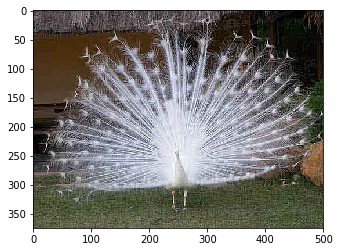

In [146]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = DF.loc[3][1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))
print(img)
# Convert img to numpy array

plt.imshow(img)
plt.show()

In [154]:
DF[0:20]['url'].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
       'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
       'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
       'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
       'http://www.porschemania.it/discus/messages/815/102099.jpg',
       'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
       'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
       'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
       'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
       'http://www

In [156]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for i in range(len(url_list)):
        try:
            response = requests.get(url_list[i])
            img = Image.open(BytesIO(response.content))
            if resize :
                img.resize(resize)
            img_list.append(img)

        except Exception as e:
            print(e)
            print('第幾個失效:{}'.format(i))
            next
    return img_list

cannot identify image file <_io.BytesIO object at 0x000001E285F904C0>
第幾個失效:4
cannot identify image file <_io.BytesIO object at 0x000001E2870E1CA8>
第幾個失效:5
cannot identify image file <_io.BytesIO object at 0x000001E2870E1CA8>
第幾個失效:6
cannot identify image file <_io.BytesIO object at 0x000001E2870E1CA8>
第幾個失效:7
cannot identify image file <_io.BytesIO object at 0x000001E2870E1CA8>
第幾個失效:8
cannot identify image file <_io.BytesIO object at 0x000001E285F90620>
第幾個失效:13
cannot identify image file <_io.BytesIO object at 0x000001E285F90990>
第幾個失效:15
Total images that we got: 13 


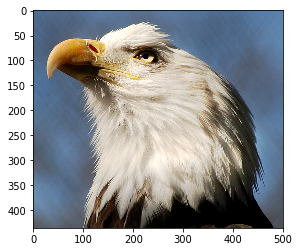

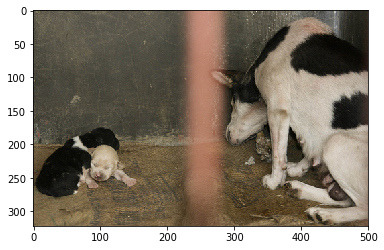

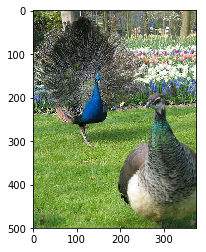

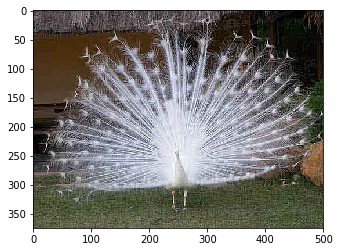

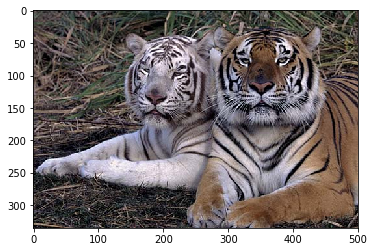

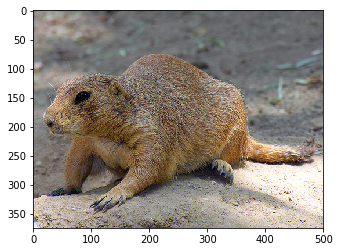

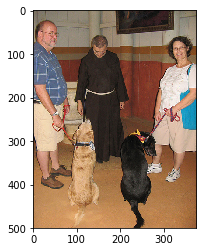

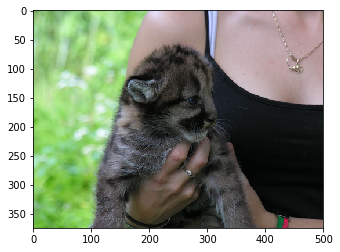

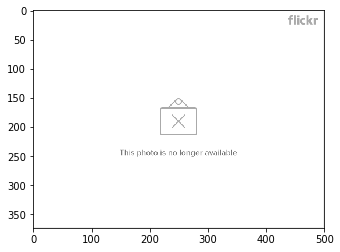

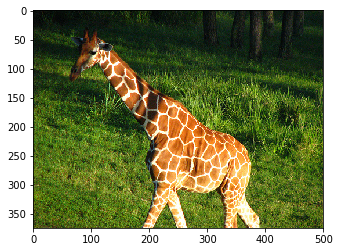

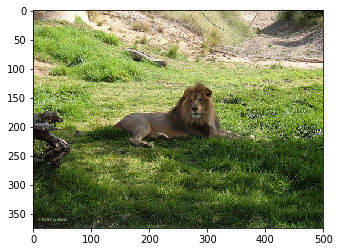

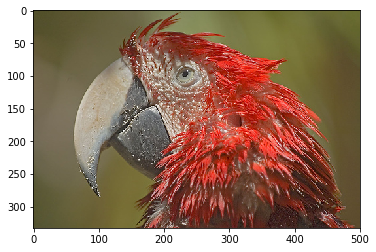

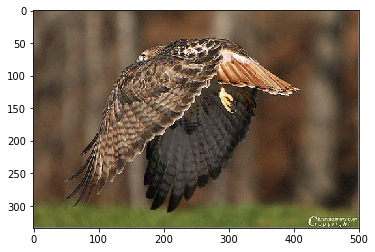

In [158]:
%matplotlib inline
result = img2arr_fromURLs(DF[0:20]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉
# 有空值，則略過
for im_get in range(len(result)):
    try :
        plt.imshow(result[im_get])
        plt.show()
    except Exception as e :
        print(e)
        print('第幾連結失效:{}'.format(i))
        next